In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline 

In [24]:
df = pd.read_csv("F://dataset_1.csv")

In [25]:
df['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df['Churn'].replace(to_replace='No',  value=0, inplace=True)

In [26]:
X = df[["SeniorCitizen", "tenure"]].to_numpy()
Y = df["Churn"].to_numpy()

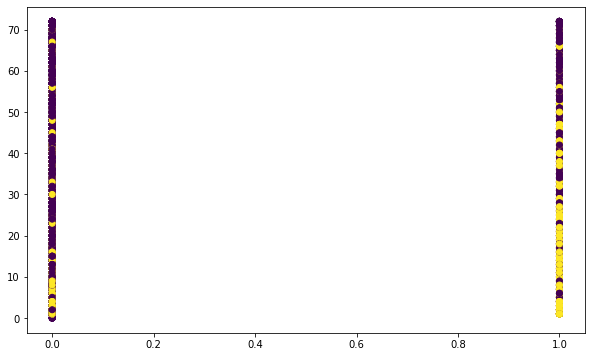

In [27]:
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c = Y)

Text(0, 0.5, 'Churn or Non-Churners')

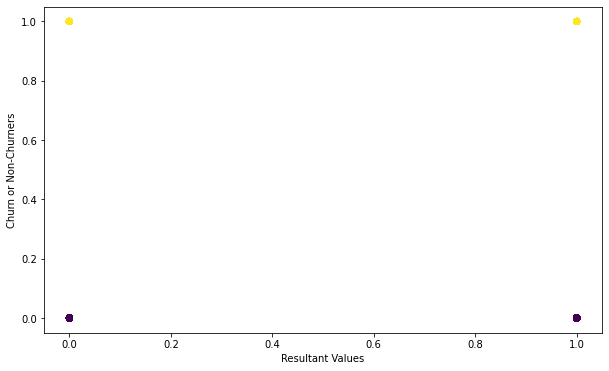

In [28]:
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], Y, c = Y)
plt.xlabel("Resultant Values")
plt.ylabel("Churn or Non-Churners")

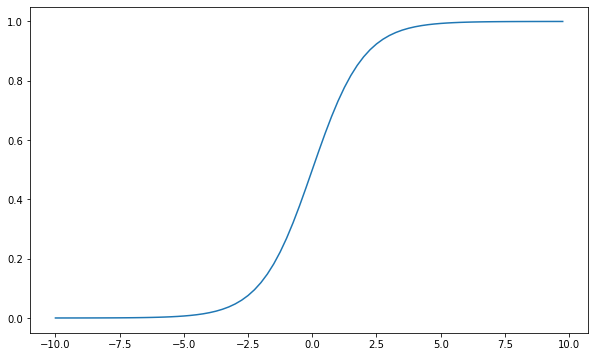

In [29]:
def sigmoid(z):
    return 1.0/(1.0 + np.exp(-z))

domain = np.arange(-10, 10, .25)
plt.figure(figsize=(10, 6))
plt.plot(domain, sigmoid(domain))

In [30]:
def cross_entropy_loss(y, y_hat):
    return -y*np.log(y_hat) - (1.0-y)*np.log(1.0-y_hat)

In [31]:
cross_entropy_loss(1.0, .5)

0.6931471805599453

In [32]:
def cross_entropy_gradient(y, y_hat, x, with_bias = True):
    if with_bias == True:
        dw = (y_hat - y)*x
        db = (y_hat - y)
        return dw, db 
    
def feed_forward(x, w, b, with_bias = True):
    if with_bias == True:
        return sigmoid(w @ x + b)

In [33]:
w = np.random.randn(2)
b = np.random.randn()
alpha = 0.25
feed_forward(X[0], w, b)

0.198792270102292

In [34]:
# Implement Stochastic Gradient Descent 
for j in range(10_000):
    i = np.random.randint(len(Y))
    x = X[i, :]
    y = Y[i]
    temp_dw = []
    temp_db = []
    for x, y in zip(X, Y):
        y_hat = feed_forward(x, w, b)
        dw, db = cross_entropy_gradient(y, y_hat, x)
        #w -= alpha*dw
        #b -= alpha*db
        temp_dw.append(dw)
        temp_db.append(db)
        
    dw = sum(temp_dw)/len(temp_dw)
    db = sum(temp_db)/len(temp_db)
    w -= alpha*dw
    b -= alpha*db
    
    total_loss = sum(cross_entropy_loss(Y[i], feed_forward(x, w, b))
                    for i, x in enumerate(X))
    if j % 1_000 == 0:
        print(f"Total Loss at time {j+1} = {total_loss}")

Total Loss at time 1 = 211540.49754930887


<ipython-input-30-c3120d8fa405>:2: RuntimeWarning: divide by zero encountered in log
  return -y*np.log(y_hat) - (1.0-y)*np.log(1.0-y_hat)
<ipython-input-30-c3120d8fa405>:2: RuntimeWarning: invalid value encountered in double_scalars
  return -y*np.log(y_hat) - (1.0-y)*np.log(1.0-y_hat)


Total Loss at time 1001 = 173408.81199291852
Total Loss at time 2001 = 99650.56938081318
Total Loss at time 3001 = 59439.36628146026
Total Loss at time 4001 = 214516.12203031083
Total Loss at time 5001 = 31101.638708344366
Total Loss at time 6001 = 135691.6564534056
Total Loss at time 7001 = 27962.34943160377
Total Loss at time 8001 = 39197.32426204022
Total Loss at time 9001 = 98022.65789299758


In [35]:
def make_prediction(x, w, b):
    y_hat = feed_forward(x, w, b)
    labels = np.array([1, 0])
    return np.random.choice(labels, p = [y_hat, 1.0-y_hat])

In [36]:
hits = 0
for x, y in zip(X, Y):
    y_hat = make_prediction(x, w, b)
    hits += int(y_hat == y)
    print(f"Prediction: {y_hat}")
    print(f"True label: {y}")
    print()
print(f"Classification Percentage = {100* (hits/len(Y))}%")

Prediction: 1
True label: 0

Prediction: 0
True label: 0

Prediction: 0
True label: 1

Prediction: 0
True label: 0

Prediction: 1
True label: 1

Prediction: 0
True label: 1

Prediction: 0
True label: 0

Prediction: 0
True label: 0

Prediction: 0
True label: 1

Prediction: 0
True label: 0

Prediction: 0
True label: 0

Prediction: 0
True label: 0

Prediction: 0
True label: 0

Prediction: 0
True label: 1

Prediction: 0
True label: 0

Prediction: 0
True label: 0

Prediction: 0
True label: 0

Prediction: 0
True label: 0

Prediction: 0
True label: 1

Prediction: 0
True label: 0

Prediction: 1
True label: 1

Prediction: 0
True label: 0

Prediction: 1
True label: 1

Prediction: 0
True label: 0

Prediction: 0
True label: 0

Prediction: 0
True label: 0

Prediction: 0
True label: 1

Prediction: 1
True label: 1

Prediction: 0
True label: 0

Prediction: 0
True label: 1

Prediction: 0
True label: 0

Prediction: 1
True label: 0

Prediction: 0
True label: 0

Prediction: 1
True label: 0

Prediction: 1



Prediction: 0
True label: 0

Prediction: 0
True label: 0

Prediction: 0
True label: 0

Prediction: 0
True label: 0

Prediction: 0
True label: 0

Prediction: 0
True label: 0

Prediction: 0
True label: 0

Prediction: 0
True label: 1

Prediction: 0
True label: 0

Prediction: 0
True label: 0

Prediction: 0
True label: 0

Prediction: 0
True label: 0

Prediction: 1
True label: 1

Prediction: 0
True label: 0

Prediction: 0
True label: 0

Prediction: 0
True label: 0

Prediction: 0
True label: 0

Prediction: 0
True label: 0

Prediction: 0
True label: 0

Prediction: 0
True label: 0

Prediction: 0
True label: 0

Prediction: 0
True label: 0

Prediction: 0
True label: 0

Prediction: 0
True label: 0

Prediction: 0
True label: 1

Prediction: 1
True label: 1

Prediction: 0
True label: 1

Prediction: 0
True label: 0

Prediction: 0
True label: 0

Prediction: 0
True label: 0

Prediction: 0
True label: 1

Prediction: 0
True label: 0

Prediction: 0
True label: 1

Prediction: 0
True label: 0

Prediction: 0


Prediction: 0
True label: 0

Prediction: 0
True label: 0

Prediction: 0
True label: 0

Prediction: 0
True label: 0

Prediction: 0
True label: 0

Prediction: 0
True label: 0

Prediction: 0
True label: 0

Prediction: 0
True label: 0

Prediction: 1
True label: 1

Prediction: 0
True label: 0

Prediction: 0
True label: 1

Prediction: 0
True label: 0

Prediction: 0
True label: 0

Prediction: 0
True label: 0

Prediction: 0
True label: 0

Prediction: 1
True label: 1

Prediction: 0
True label: 0

Prediction: 0
True label: 0

Prediction: 0
True label: 0

Prediction: 0
True label: 0

Prediction: 0
True label: 0

Prediction: 0
True label: 1

Prediction: 0
True label: 0

Prediction: 0
True label: 1

Prediction: 0
True label: 0

Prediction: 0
True label: 0

Prediction: 1
True label: 1

Prediction: 0
True label: 0

Prediction: 0
True label: 0

Prediction: 0
True label: 0

Prediction: 0
True label: 0

Prediction: 0
True label: 0

Prediction: 0
True label: 0

Prediction: 1
True label: 0

Prediction: 0

Prediction: 0
True label: 1

Prediction: 0
True label: 0

Prediction: 0
True label: 0

Prediction: 0
True label: 0

Prediction: 0
True label: 0

Prediction: 0
True label: 0

Prediction: 0
True label: 0

Prediction: 0
True label: 0

Prediction: 0
True label: 0

Prediction: 0
True label: 0

Prediction: 0
True label: 0

Prediction: 0
True label: 0

Prediction: 1
True label: 0

Prediction: 0
True label: 0

Prediction: 0
True label: 0

Prediction: 0
True label: 1

Prediction: 0
True label: 1

Prediction: 0
True label: 0

Prediction: 0
True label: 0

Prediction: 0
True label: 0

Prediction: 0
True label: 0

Prediction: 1
True label: 1

Prediction: 0
True label: 0

Prediction: 0
True label: 1

Prediction: 0
True label: 0

Prediction: 0
True label: 0

Prediction: 0
True label: 0

Prediction: 0
True label: 1

Prediction: 1
True label: 1

Prediction: 0
True label: 0

Prediction: 0
True label: 0

Prediction: 0
True label: 0

Prediction: 1
True label: 0

Prediction: 0
True label: 0

Prediction: 0


Prediction: 1
True label: 1

Prediction: 0
True label: 0

Prediction: 0
True label: 1

Prediction: 1
True label: 1

Prediction: 1
True label: 0

Prediction: 0
True label: 1

Prediction: 0
True label: 1

Prediction: 0
True label: 0

Prediction: 0
True label: 0

Prediction: 0
True label: 0

Prediction: 0
True label: 0

Prediction: 0
True label: 0

Prediction: 1
True label: 1

Prediction: 0
True label: 0

Prediction: 1
True label: 0

Prediction: 0
True label: 0

Prediction: 0
True label: 1

Prediction: 0
True label: 0

Prediction: 0
True label: 0

Prediction: 0
True label: 1

Prediction: 0
True label: 1

Prediction: 0
True label: 0

Prediction: 0
True label: 0

Prediction: 1
True label: 1

Prediction: 0
True label: 0

Prediction: 0
True label: 0

Prediction: 0
True label: 0

Prediction: 0
True label: 0

Prediction: 0
True label: 0

Prediction: 0
True label: 0

Prediction: 1
True label: 0

Prediction: 0
True label: 0

Prediction: 0
True label: 0

Prediction: 0
True label: 1

Prediction: 0


True label: 1

Prediction: 0
True label: 0

Prediction: 0
True label: 0

Prediction: 0
True label: 0

Prediction: 0
True label: 0

Prediction: 0
True label: 1

Prediction: 0
True label: 0

Prediction: 0
True label: 1

Prediction: 0
True label: 0

Prediction: 0
True label: 0

Prediction: 0
True label: 0

Prediction: 0
True label: 0

Prediction: 0
True label: 1

Prediction: 0
True label: 0

Prediction: 0
True label: 1

Prediction: 0
True label: 0

Prediction: 0
True label: 0

Prediction: 0
True label: 0

Prediction: 0
True label: 1

Prediction: 0
True label: 0

Prediction: 0
True label: 0

Prediction: 0
True label: 0

Prediction: 0
True label: 0

Prediction: 0
True label: 0

Prediction: 0
True label: 0

Prediction: 0
True label: 0

Prediction: 0
True label: 0

Prediction: 0
True label: 1

Prediction: 1
True label: 1

Prediction: 0
True label: 0

Prediction: 1
True label: 0

Prediction: 0
True label: 0

Prediction: 0
True label: 0

Prediction: 0
True label: 0

Prediction: 0
True label: 1



Prediction: 0
True label: 0

Prediction: 0
True label: 0

Prediction: 0
True label: 0

Prediction: 0
True label: 0

Prediction: 0
True label: 0

Prediction: 0
True label: 0

Prediction: 0
True label: 0

Prediction: 0
True label: 0

Prediction: 0
True label: 0

Prediction: 0
True label: 1

Prediction: 1
True label: 0

Prediction: 0
True label: 1

Prediction: 0
True label: 0

Prediction: 1
True label: 1

Prediction: 0
True label: 0

Prediction: 0
True label: 1

Prediction: 0
True label: 0

Prediction: 0
True label: 1

Prediction: 0
True label: 0

Prediction: 0
True label: 0

Prediction: 0
True label: 1

Prediction: 0
True label: 0

Prediction: 1
True label: 1

Prediction: 0
True label: 0

Prediction: 0
True label: 0

Prediction: 0
True label: 1

Prediction: 0
True label: 1

Prediction: 0
True label: 0

Prediction: 0
True label: 0

Prediction: 0
True label: 1

Prediction: 1
True label: 1

Prediction: 0
True label: 1

Prediction: 0
True label: 0

Prediction: 0
True label: 1

Prediction: 0

Prediction: 0
True label: 0

Prediction: 0
True label: 1

Prediction: 0
True label: 0

Prediction: 0
True label: 0

Prediction: 0
True label: 1

Prediction: 0
True label: 1

Prediction: 0
True label: 1

Prediction: 0
True label: 0

Prediction: 0
True label: 0

Prediction: 0
True label: 0

Prediction: 0
True label: 0

Prediction: 0
True label: 1

Prediction: 0
True label: 1

Prediction: 1
True label: 0

Prediction: 0
True label: 0

Prediction: 0
True label: 0

Prediction: 0
True label: 0

Prediction: 0
True label: 0

Prediction: 0
True label: 1

Prediction: 0
True label: 0

Prediction: 0
True label: 0

Prediction: 0
True label: 0

Prediction: 0
True label: 0

Prediction: 0
True label: 0

Prediction: 0
True label: 0

Prediction: 0
True label: 0

Prediction: 0
True label: 0

Prediction: 0
True label: 0

Prediction: 0
True label: 1

Prediction: 0
True label: 0

Prediction: 0
True label: 0

Prediction: 0
True label: 0

Prediction: 1
True label: 1

Prediction: 0
True label: 1

Prediction: 0


Prediction: 0
True label: 0

Prediction: 1
True label: 1

Prediction: 1
True label: 1

Prediction: 0
True label: 0

Prediction: 0
True label: 0

Prediction: 0
True label: 0

Prediction: 0
True label: 0

Prediction: 0
True label: 1

Prediction: 0
True label: 1

Prediction: 0
True label: 0

Prediction: 0
True label: 0

Prediction: 0
True label: 0

Prediction: 0
True label: 0

Prediction: 1
True label: 0

Prediction: 0
True label: 0

Prediction: 1
True label: 0

Prediction: 0
True label: 0

Prediction: 0
True label: 1

Prediction: 0
True label: 0

Prediction: 0
True label: 0

Prediction: 0
True label: 0

Prediction: 0
True label: 1

Prediction: 0
True label: 0

Prediction: 0
True label: 0

Prediction: 0
True label: 0

Prediction: 0
True label: 0

Prediction: 0
True label: 1

Prediction: 0
True label: 0

Prediction: 0
True label: 1

Prediction: 0
True label: 0

Prediction: 0
True label: 0

Prediction: 0
True label: 0

Prediction: 0
True label: 0

Prediction: 0
True label: 1

Prediction: 0


Prediction: 0
True label: 0

Prediction: 0
True label: 0

Prediction: 0
True label: 0

Prediction: 1
True label: 0

Prediction: 0
True label: 1

Prediction: 0
True label: 1

Prediction: 1
True label: 1

Prediction: 0
True label: 1

Prediction: 1
True label: 1

Prediction: 0
True label: 0

Prediction: 0
True label: 0

Prediction: 1
True label: 1

Prediction: 0
True label: 0

Prediction: 0
True label: 0

Prediction: 0
True label: 0

Prediction: 0
True label: 1

Prediction: 0
True label: 0

Prediction: 0
True label: 0

Prediction: 0
True label: 0

Prediction: 1
True label: 1

Prediction: 0
True label: 0

Prediction: 1
True label: 1

Prediction: 1
True label: 1

Prediction: 0
True label: 0

Prediction: 0
True label: 1

Prediction: 1
True label: 1

Prediction: 0
True label: 0

Prediction: 0
True label: 0

Prediction: 0
True label: 0

Prediction: 0
True label: 0

Prediction: 0
True label: 0

Prediction: 0
True label: 1

Prediction: 1
True label: 1

Prediction: 0
True label: 1

Prediction: 0
